In [2]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage to scrape
url = "https://cogcomp.seas.upenn.edu/Data/QA/QC/train_1000.label"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, "html.parser")

In [3]:
qlist=soup.text.split("\n")

In [4]:
questions=[]
label=[]
oc=0
cc=0
#open=0 close=1
for text in qlist:
  j=text.split(" ",1)


  if(len(j)>1):


    if(j[0].startswith("DESC")):
      oc=oc+1
      label.append(0)
       
       
    
    else:
      cc=cc+1
      label.append(1)
    questions.append(j[1].lower())


In [128]:
print(oc,cc)

211 789


In [5]:
from datasets import load_dataset

dataset = load_dataset("launch/open_question_type")



In [7]:
import pandas as pd
merged_df = pd.concat([dataset['train'].to_pandas(), dataset['test'].to_pandas()], ignore_index=True)

# Drop unnecessary columns
merged_df.drop(columns=['id', 'annotator1', 'annotator2', 'resolve_type'], inplace=True)
print(merged_df)
questions.extend(merged_df['question'][:450])

    
    
# Add 'type' attribute with value 'open' for all rows


                                               question
0     When two bacteria exchange genetic information...
1     Is it possible to be your brothers best friend...
2     Is internet gambling or wagering prohibited in...
3                   How can u tell if a girl likes you?
4     Is it OK to have a newborn sleep with the pare...
...                                                 ...
4371  Why can't we use other countries' research whe...
4372  How does cancer start in one specific part of ...
4373  How are commuter trains able to operate backwa...
4374  Why are some smaller countries able to outcomp...
4375  How does Instagram know the difference between...

[4376 rows x 1 columns]


In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [8]:
import re
import inflect
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

In [9]:
questions=remove_punctuation(questions)
questions=replace_numbers(questions)

In [7]:
import shutil
from gensim.models import KeyedVectors

In [10]:
import gzip
import shutil
from gensim.models import KeyedVectors

# Step 1: Decompress the .gz file
#input_file = r'C:\Users\asus\Desktop\iknowthis\finalenv\CNN TEXT\GoogleNews-vectors-negative300-SLIM.bin.gz'
#output_file = r'C:\Users\asus\Desktop\iknowthis\finalenv\CNN TEXT\word2vec_model\GoogleNews-vectors-negative300-SLIM.bin'

# Decompress the file
#with gzip.open(input_file, 'rb') as f_in:
#    with open(output_file, 'wb') as f_out:
#        shutil.copyfileobj(f_in, f_out)

print("File decompressed successfully")


# Step 2: Load the Word2Vec model
model_path = 'word2vec_model/GoogleNews-vectors-negative300-SLIM.bin'
embed_lookup = KeyedVectors.load_word2vec_format(model_path, binary=True)

File decompressed successfully


In [11]:

pretrained_words = []
for word in embed_lookup.index_to_key:
    pretrained_words.append(word)
row_idx = 1

# get word/embedding in that row
word = pretrained_words[row_idx] # get words by index
embedding = embed_lookup[word] # embeddings by word

# vocab and embedding info
print("Size of Vocab: {}\n".format(len(pretrained_words)))
print('Word in vocab: {}\n'.format(word))
print('Length of embedding: {}\n'.format(len(embedding)))

Size of Vocab: 299567

Word in vocab: for

Length of embedding: 300



In [25]:
find_similar_to = 'fabulous'

print('Similar words to '+find_similar_to+': \n')

# Find similar words, using cosine similarity
# by default shows top 10 similar words
for similar_word in embed_lookup.similar_by_word(find_similar_to):
    print("Word: {0}, Similarity: {1:.3f}".format(
        similar_word[0], similar_word[1]
    ))

Similar words to fabulous: 

Word: wonderful, Similarity: 0.761
Word: fantastic, Similarity: 0.761
Word: marvelous, Similarity: 0.730
Word: gorgeous, Similarity: 0.714
Word: lovely, Similarity: 0.713
Word: terrific, Similarity: 0.694
Word: amazing, Similarity: 0.693
Word: beautiful, Similarity: 0.670
Word: magnificent, Similarity: 0.667
Word: splendid, Similarity: 0.645


In [15]:
tokenized_questions = tokenize_all_questions(embed_lookup, questions)

In [12]:
def tokenize_all_questions(embed_lookup, questions):
    tokenized_questions = []
    
    for question in questions:
        # Tokenize each question into words
        words = question.split()
        
        # Initialize list to store tokenized indices for current question
        tokenized_question = []
        
        # Convert each word to its embedding index if available, otherwise use 0 (for out-of-vocabulary words)
        for word in words:
            try:
                idx = embed_lookup.key_to_index[word]
            except KeyError:
                idx = 0  # Use 0 for out-of-vocabulary words or adjust as needed
            tokenized_question.append(idx)
        
        tokenized_questions.append(tokenized_question)
    
    return tokenized_questions

# Example usage:


# Assuming embed_lookup is already loaded with your Word2Vec embeddings

tokenized_questions = tokenize_all_questions(embed_lookup, questions)
print(tokenized_questions)


[[132, 87, 96594, 1263, 0, 0, 138, 754, 127297], [78, 2419, 2648, 9, 1924, 0, 247874], [132, 45, 4365, 336, 0, 680, 0, 6447, 560, 1559], [78, 35804, 10196, 9, 6030, 50, 9, 66972, 32, 0, 9, 15924], [78, 3, 9, 312, 784, 0, 16777], [78, 64675, 70137, 4873, 9, 31357, 15, 119, 3221], [78, 96, 87, 1547, 1239, 21452, 154201, 48749, 385], [78, 3, 9, 4840, 7334], [78, 17, 10133, 23691], [494, 9, 0, 19765, 14468, 0, 9, 145, 2134], [56, 8, 270747, 0, 1550], [512, 53, 12097, 6615, 1080, 10802, 2538], [28, 8, 9, 4436, 0, 9, 127044], [28, 469, 203799], [78, 3, 1034, 9, 37063, 2374, 9, 941, 291, 22, 491, 1919], [78, 10280, 154, 105, 7614, 9, 100, 5306], [78, 87, 9, 84, 21267, 4743, 0, 9, 154, 4205, 331, 6], [132, 124, 100920, 33, 5498, 0, 7740, 4991, 128, 0], [78, 3, 564, 3559, 14629], [78, 3, 24, 59632, 72818], [78, 3, 9, 843, 0, 6406, 107], [78, 3342, 0, 3583, 17, 30592, 0, 11041], [494, 0, 2495, 24355], [78, 1239, 9, 86996, 14192], [78, 3, 9, 7455, 0, 9, 494, 229401], [78, 1239, 9, 0, 82215, 0, 47

In [12]:
def pad_features(tokenized_reviews, seq_length):
    ''' Return features of tokenized_reviews, where each review is padded with 0's 
        or truncated to the input seq_length.
    '''
    
    # getting the correct rows x cols shape
    features = np.zeros((len(tokenized_reviews), seq_length), dtype=int)

    # for each review, I grab that review and 
    for i, row in enumerate(tokenized_reviews):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features

In [16]:
seq_length = 200
import numpy as np
features = pad_features(tokenized_questions, seq_length=seq_length)

## test statements - do not change - ##
assert len(features)==len(tokenized_questions), "Features should have as many rows as reviews."
assert len(features[0])==seq_length, "Each feature row should contain seq_length values."

# print first 8 values of the first 20 batches 
print(features[:20,:8])

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [13]:
def pad_features(tokenized_reviews, seq_length):
    ''' Return features of tokenized_reviews, where each review is padded with 0's 
        or truncated to the input seq_length.
    '''
    # Initialize an array of zeros with the correct shape
    features = np.zeros((len(tokenized_reviews), seq_length), dtype=int)

    # Iterate over each tokenized review
    for i, review in enumerate(tokenized_reviews):
        # Get the length of the current review
        review_len = len(review)
        
        # Pad review with 0s or truncate to the specified sequence length
        if review_len <= seq_length:
            features[i, :review_len] = review
        else:
            features[i, :] = review[:seq_length]
    
    return features

In [15]:
import numpy as np
seq_length = 200

features = pad_features(tokenized_questions, seq_length=seq_length)

# Test assertions
assert len(features) == len(tokenized_questions), "Features should have as many rows as tokenized_questions."
assert len(features[0]) == seq_length, f"Each feature row should contain {seq_length} values."

# Print the first few rows and columns of the features
print(features)

[[  132    87 96594 ...     0     0     0]
 [   78  2419  2648 ...     0     0     0]
 [  132    45  4365 ...     0     0     0]
 ...
 [ 1825    17 15753 ...     0     0     0]
 [  443 21809   813 ...     0     0     0]
 [ 7479   942    31 ...     0     0     0]]


In [99]:
split_frac = 0.8

## split data into training, validation, and test data (features and labels, x and y)

split_idx = int(len(features)*split_frac)
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = label[:split_idx], label[split_idx:]

test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

## print out the shapes of your resultant feature data
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			Feature Shapes:
Train set: 		(800, 200) 
Validation set: 	(100, 200) 
Test set: 		(100, 200)


In [16]:
import numpy as np

# Sample dataset
np.random.seed(42)  # For reproducibility

# Example features and labels (0 for open-ended, 1 for close-ended)
features = np.random.randint(0, 100, (100, 10))  # 100 samples, 10 features each
labels = np.random.randint(0, 2, 100)            # 0 or 1 labels

# Split data by class
open_ended_idx = np.where(labels == 0)[0]
close_ended_idx = np.where(labels == 1)[0]

# Shuffle indices to ensure randomness
np.random.shuffle(open_ended_idx)
np.random.shuffle(close_ended_idx)

# Determine split sizes
split_frac = 0.8
val_frac = 0.1  # 10% for validation, 10% for test
train_frac = 0.8  # 80% for training

def split_indices(indices, train_frac, val_frac):
    train_size = int(len(indices) * train_frac)
    val_size = int(len(indices) * val_frac)
    train_idx = indices[:train_size]
    val_idx = indices[train_size:train_size + val_size]
    test_idx = indices[train_size + val_size:]
    return train_idx, val_idx, test_idx

# Split each class into train, val, and test
train_open_idx, val_open_idx, test_open_idx = split_indices(open_ended_idx, train_frac, val_frac)
train_close_idx, val_close_idx, test_close_idx = split_indices(close_ended_idx, train_frac, val_frac)

# Combine splits from both classes
train_idx = np.concatenate([train_open_idx, train_close_idx])
val_idx = np.concatenate([val_open_idx, val_close_idx])
test_idx = np.concatenate([test_open_idx, test_close_idx])

# Create final train, val, test sets
train_x, train_y = features[train_idx], labels[train_idx]
val_x, val_y = features[val_idx], labels[val_idx]
test_x, test_y = features[test_idx], labels[test_idx]

In [17]:
import torch
from torch.utils.data import TensorDataset, DataLoader
train_x = np.array(train_x)
train_y = np.array(train_y)
val_x = np.array(val_x)
val_y = np.array(val_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 50


# shuffling and batching data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [100]:
print(val_y)

[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [25]:
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

No GPU available, training on CPU.


In [18]:
import torch.nn as nn
import torch.nn.functional as F

class SentimentCNN(nn.Module):
    """
    The embedding layer + CNN model that will be used to perform sentiment analysis.
    """

    def __init__(self, embed_model, vocab_size, output_size, embedding_dim,
                 num_filters=100, kernel_sizes=[3, 4, 5], freeze_embeddings=True, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentCNN, self).__init__()

        # set class vars
        self.num_filters = num_filters
        self.embedding_dim = embedding_dim
        
        # 1. embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        # set weights to pre-trained
        self.embedding.weight = nn.Parameter(torch.from_numpy(embed_model.vectors)) # all vectors
        # (optional) freeze embedding weights
        if freeze_embeddings:
            self.embedding.requires_grad = False
        
        # 2. convolutional layers
        self.convs_1d = nn.ModuleList([
            nn.Conv2d(1, num_filters, (k, embedding_dim), padding=(k-2,0)) 
            for k in kernel_sizes])
        
        # 3. final, fully-connected layer for classification
        self.fc = nn.Linear(len(kernel_sizes) * num_filters, output_size) 
        
        # 4. dropout and sigmoid layers
        self.dropout = nn.Dropout(drop_prob)
        self.sig = nn.Sigmoid()
        
    
    def conv_and_pool(self, x, conv):
        """
        Convolutional + max pooling layer
        """
        # squeeze last dim to get size: (batch_size, num_filters, conv_seq_length)
        # conv_seq_length will be ~ 200
        x = F.relu(conv(x)).squeeze(3)
        
        # 1D pool over conv_seq_length
        # squeeze to get size: (batch_size, num_filters)
        x_max = F.max_pool1d(x, x.size(2)).squeeze(2)
        return x_max

    def forward(self, x):
        """
        Defines how a batch of inputs, x, passes through the model layers.
        Returns a single, sigmoid-activated class score as output.
        """
        # embedded vectors
        embeds = self.embedding(x) # (batch_size, seq_length, embedding_dim)
        # embeds.unsqueeze(1) creates a channel dimension that conv layers expect
        embeds = embeds.unsqueeze(1)
        
        # get output of each conv-pool layer
        conv_results = [self.conv_and_pool(embeds, conv) for conv in self.convs_1d]
        
        # concatenate results and add dropout
        x = torch.cat(conv_results, 1)
        x = self.dropout(x)
        
        # final logit
        logit = self.fc(x) 
        
        # sigmoid-activated --> a class score
        return self.sig(logit)
      

In [19]:
vocab_size = len(pretrained_words)
output_size = 1 # binary class (1 or 0)
embedding_dim = len(embed_lookup[pretrained_words[0]]) # 300-dim vectors
num_filters = 100
kernel_sizes = [3, 4, 5]

net = SentimentCNN(embed_lookup, vocab_size, output_size, embedding_dim,
                   num_filters, kernel_sizes)

print(net)

SentimentCNN(
  (embedding): Embedding(299567, 300)
  (convs_1d): ModuleList(
    (0): Conv2d(1, 100, kernel_size=(3, 300), stride=(1, 1), padding=(1, 0))
    (1): Conv2d(1, 100, kernel_size=(4, 300), stride=(1, 1), padding=(2, 0))
    (2): Conv2d(1, 100, kernel_size=(5, 300), stride=(1, 1), padding=(3, 0))
  )
  (fc): Linear(in_features=300, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (sig): Sigmoid()
)


In [20]:
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [26]:
def train(net, train_loader, epochs, print_every=100):

    # move model to GPU, if available
    if(train_on_gpu):
        net.cuda()

    counter = 0 # for printing
    
    # train for some number of epochs
    net.train()
    for e in range(epochs):

        # batch loop
        for inputs, labels in train_loader:
            counter += 1

            if(train_on_gpu):
                inputs, labels = inputs.cuda(), labels.cuda()

            # zero accumulated gradients
            net.zero_grad()

            # get the output from the model
            output = net(inputs)

            # calculate the loss and perform backprop
            loss = criterion(output.squeeze(), labels.float())
            loss.backward()
            optimizer.step()

            # loss stats
            if counter % print_every == 0:
                # Get validation loss
                val_losses = []
                net.eval()
                for inputs, labels in valid_loader:

                    if(train_on_gpu):
                        inputs, labels = inputs.cuda(), labels.cuda()

                    output = net(inputs)
                    val_loss = criterion(output.squeeze(), labels.float())

                    val_losses.append(val_loss.item())

                net.train()
                print("Epoch: {}/{}...".format(e+1, epochs),
                      "Step: {}...".format(counter),
                      "Loss: {:.6f}...".format(loss.item()),
                      "Val Loss: {:.6f}".format(np.mean(val_losses)))

In [27]:
epochs = 5 # this is approx where I noticed the validation loss stop decreasing
print_every = 100

train(net, train_loader, epochs, print_every=print_every)

In [28]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0


net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # get predicted outputs
    output = net(inputs)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.700
Test accuracy: 0.500


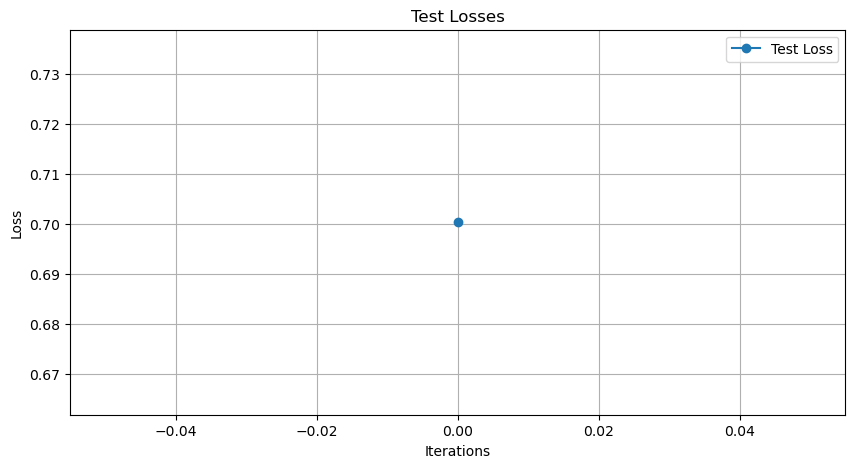

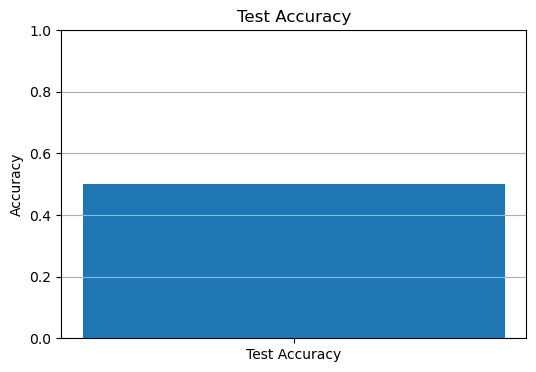

In [29]:
import matplotlib.pyplot as plt

# Assuming you have already executed the code snippet provided to calculate test_losses, num_correct, test_acc

# Plotting test losses
plt.figure(figsize=(10, 5))
plt.plot(test_losses, label='Test Loss', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Test Losses')
plt.legend()
plt.grid(True)
plt.show()

# Plotting test accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Test Accuracy'], [test_acc])
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


TypeError: object of type 'numpy.float64' has no len()

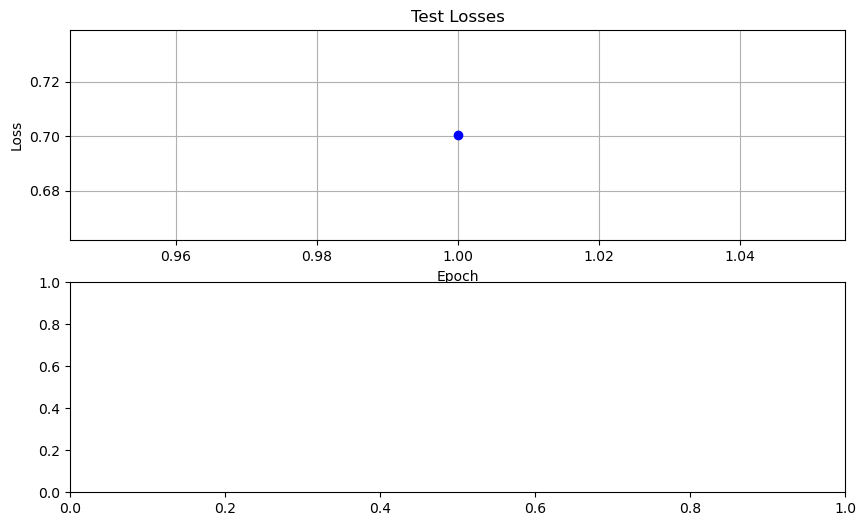

In [30]:
plt.figure(figsize=(10, 6))

# Plot Test Losses
plt.subplot(2, 1, 1)
plt.plot(range(1, len(test_losses) + 1), test_losses, marker='o', color='blue')
plt.title('Test Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plot Test Accuracy
plt.subplot(2, 1, 2)
plt.plot(range(1, len(test_acc) + 1), test_acc, marker='o', color='green')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)

plt.tight_layout()
plt.show()

In [116]:
from string import punctuation

# helper function to process and tokenize a single review
def tokenize_review(embed_lookup, test_review):
    test_review = test_review.lower() # lowercase
    # get rid of punctuation
    test_text = ''.join([c for c in test_review if c not in punctuation])

    # splitting by spaces
    test_words = test_text.split()

    # tokens
    tokenized_review = []
    for word in test_words:
        try:
            idx = embed_lookup.vocab[word].index
        except: 
            idx = 0
        tokenized_review.append(idx)

    return tokenized_review
def predict(embed_lookup, net, test_review, sequence_length=200):
    """
    Predict whether a given test_review has negative or positive sentiment.
    """
    
    net.eval()
    
    # tokenize review
    test_ints = tokenize_review(embed_lookup, test_review)
    
    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features([test_ints], seq_length)
    
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
    
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    
    # get the output from the model
    output = net(feature_tensor)
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    
    # print custom response
    if(pred.item()==0):
        print("open question!")
    else:
        print("close question.")

In [145]:
seq_length=200 # good to use the length that was trained on
# negative test review
question = 'did u have lunch?'

# test negative review


In [1]:
predict(embed_lookup, net, question, seq_length)

NameError: name 'predict' is not defined